In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pylamp.neural.layers import Linear
from pylamp.neural.activations import Sigmoid, TanH, ReLU
from pylamp.optim.optimizer import SGD
from pylamp.loss.losses import BCELoss, MSELoss
from pylamp.utils.data import DataGenerator as dg 

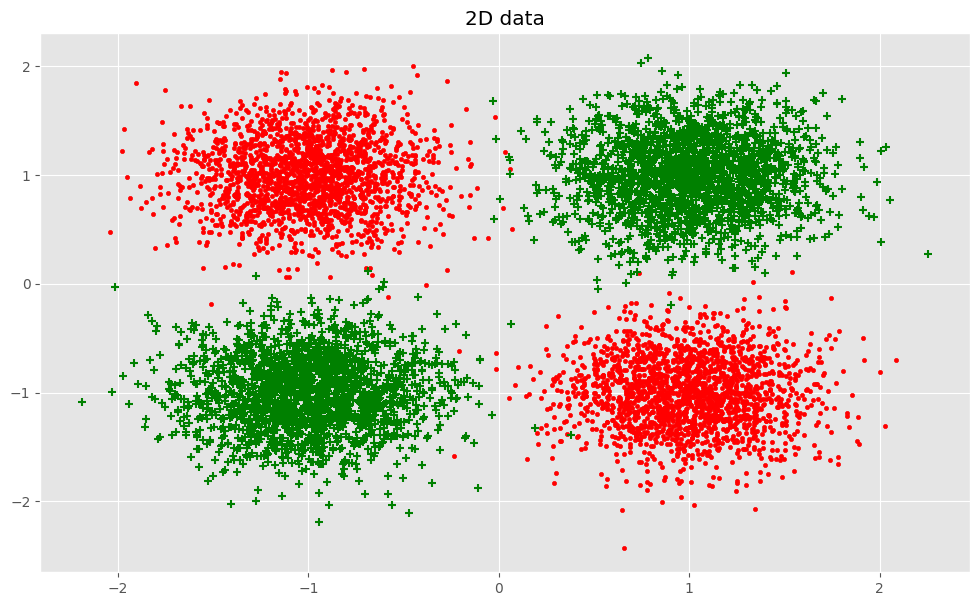

In [3]:
X_train, X_test, y_train, y_test  = dg.generate_2D_data(data_type=1, epsilon=0.1, train_size=0.8, nbex=10000)
dg.plot_2D_data(X_train, y_train)

In [4]:
class ModelWrapper():
    def __init__(self, models) -> None:
        self.models = models
    
    def forward(self,X):
        output = X 
        for model in self.models:
            output = model.forward(output)
        return output

In [5]:
input_size = X_train.shape[1]
hidden_size = 64
output_size = y_train.shape[1]

print(f'input_size: {input_size}, output_size: {output_size}')

fc1 = Linear(input_size, hidden_size, use_bias=True)
fc2 = Linear(hidden_size, output_size, use_bias=True)
tanh = TanH()
sigmoid = Sigmoid()
model_to_plot = ModelWrapper([fc1,tanh,fc2,sigmoid])
loss = BCELoss()
train_loss = SGD.step_multiple(
    fc1,fc2,tanh,sigmoid, loss, X_train=X_train, y_train=y_train, 
    epochs=120, lr=1e-3, batch_size=64, verbose=True,
    plot_boundary = False, model_to_plot=model_to_plot
)

input_size: 2, output_size: 1
Epoch 0 : Train loss : 3.7984176407187586
Epoch 12 : Train loss : 0.4311304087925191
Epoch 24 : Train loss : 0.23103599163078875
Epoch 36 : Train loss : 0.15926469035322616
Epoch 48 : Train loss : 0.1235984718728875
Epoch 60 : Train loss : 0.1024906589728344
Epoch 72 : Train loss : 0.08857537934485091
Epoch 84 : Train loss : 0.07870940764071453
Epoch 96 : Train loss : 0.07134046494098074
Epoch 108 : Train loss : 0.06561805110840543
Model updated 15000 times.


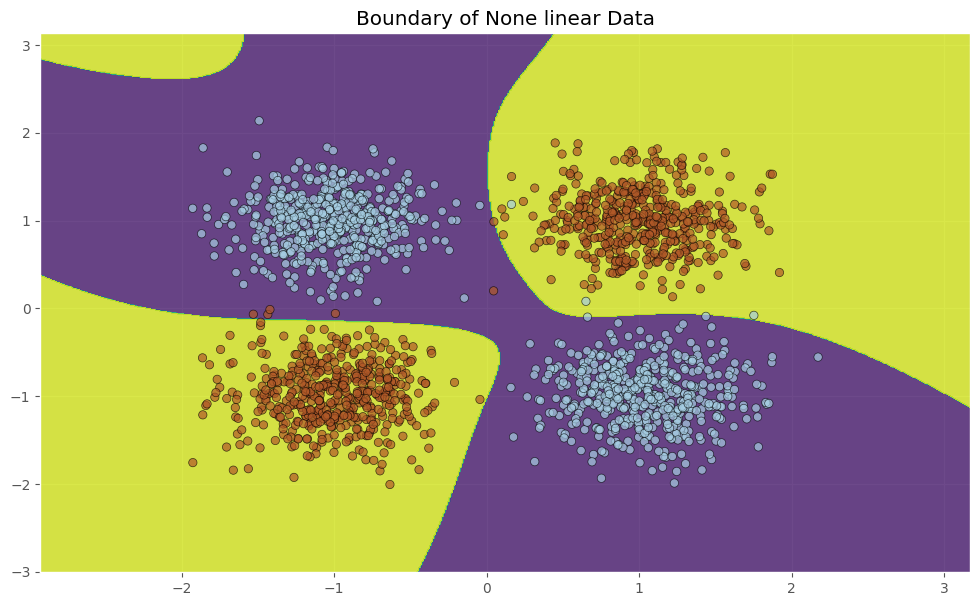

In [6]:
dg.plot_decision_boundary(X_test, y_test, model_to_plot, "Boundary of None linear Data", alpha=0.7)